# Job Changes for Data Scientists - HR Analytics

This is a dataset downloaded from a user who shared it on Kaggle that contains information on currently employed data scientists who are either looking for a job or not looking for a job. You can find the website to download this dataset at this url:

    https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists

If you use this notebook for further analysis, make sure the csv file is in the same directory that this notebook is stored in.

Important information about the dataset includes:

A target value of 1 means someone is looking for a new job, while 0 means someone is not looking for a new job.

"last_new_job" refers to how many years it has been since that person has had a different job (i.e. how long they've been at their current job.)

"city_development_index" is an scaled index that details how developed a city is. 0 means a city is completely underdeveloped, while a 1 means a city is fully developed.

Sidenote for data scientists compiling similar datasets, here are a few factors I think would be interesting to consider:

    1) If people have had an internship before their current job (or their current job is an internship).
        
        0 being never had an internship, 1 being their job is an internship, 2 being they've had an internship before 
        their current employment.
    
    2) Whether their employment is full-time, part-time or temporary.
       
       This way, you can filter out those whos position are only temporary, as those people are obviously going to be 
       looking for work after their current employment.

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

In [2]:
import math

In [3]:
job_changes_df = pd.read_csv('aug_train.csv')

In [4]:
job_changes_df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


Looking at this dataset, let's answer the following questions:

    1) What  were the average training hours for each gender, including null values (non-binary/not stated)?

    2) Which gender was most likely to have relevant experience?

    3) Does having too many previous jobs and a lack of experience affect a person's decision to leave the company?

    4) Did a person's education level or major/discipline affect their likelihood of having relevent experience?
    
    5) Does the type of company and the company size affect the probability of someone leaving their company?

    6) Does the city development index or the city they live affect an employee's decision to leave company?
    

We can determine how likely (i.e. the probability) it is for an employee to be looking for another job based on these factors.

There's plenty of interesting avenues to explore, these are just a few. I think ultimately we'll find the probabilities of factors that affect a person's likelihood of deciding to look for another job and combine them in a way that yields the probability of each person in the dataset and create a column with that information. Let's get started!

Fixing some typos in the 'relevent' category to 'relevant':

In [5]:
job_changes_df.rename({'relevent_experience':'relevant_experience'},axis=1,inplace=True)

In [6]:
job_changes_df.head()

,enrollee_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [7]:
for i in job_changes_df.relevant_experience.index:
    if job_changes_df.relevant_experience[i] == 'Has relevent experience':
        job_changes_df.relevant_experience.loc[i] = 'Has relevant experience'
    else:
        job_changes_df.relevant_experience.loc[i] = 'No relevant experience'

C:\Users\dfbod\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [8]:
job_changes_df.head()

,enrollee_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevant experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevant experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevant experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevant experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


## What were the average training hours for each gender, including null values (non-binary/not stated)?

Let's fill in some of the null values that can give us more insight into a few categories:

In [9]:
len(job_changes_df)

19158

In [10]:
job_changes_df.gender.fillna('non-binary/not stated',inplace=True)

In [11]:
job_changes_df.gender.value_counts()

Male                     13221
non-binary/not stated     4508
Female                    1238
Other                      191
Name: gender, dtype: int64

Other falls under the non-binary/not stated category, so let's simplify those categories:

In [12]:
for i in range(0,len(job_changes_df['gender'])):
    if job_changes_df.gender.values[i]=='Other':
        job_changes_df.gender.loc[i] = 'non-binary/not stated'

C:\Users\dfbod\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [13]:
job_changes_df.gender.value_counts()

Male                     13221
non-binary/not stated     4699
Female                    1238
Name: gender, dtype: int64

In [14]:
for i in range(0,len(job_changes_df)):
    if job_changes_df.last_new_job.values[i]=='never':
        job_changes_df.last_new_job.loc[i] = 0

This changed the last_new_job value 'never' to 0. 

0 means they never had a previous job before their current job.

In [15]:
job_changes_df.last_new_job.value_counts()

1     8040
>4    3290
2     2900
0     2452
4     1029
3     1024
Name: last_new_job, dtype: int64

Let's answer the first question now:

In [16]:
job_changes_df.groupby('gender')['training_hours'].mean()

gender
Female                   65.636511
Male                     65.297633
non-binary/not stated    65.490743
Name: training_hours, dtype: float64

Men, Women, and non-binary/not stated genders all train the exact same amount of hours, on average.

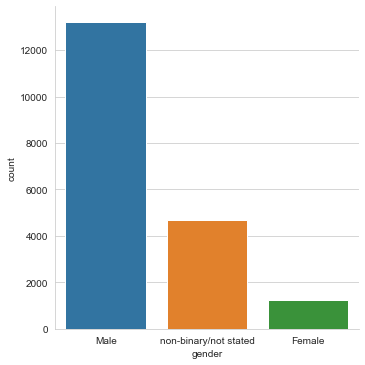

In [17]:
sns.catplot(x='gender',data=job_changes_df,kind='count')

I'm curious to see a histogram of the training hours.

<AxesSubplot:xlabel='training_hours', ylabel='Count'>

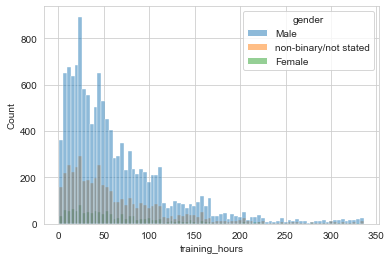

In [18]:
sns.histplot(x='training_hours',data=job_changes_df,bins=80,hue='gender')

This type of skew is to be expected, but there is a considerable amount of people who train for more than 100 hours. This appears to be primarily men, especially so after about 150 hours.

In [19]:
job_changes_df.groupby('gender')['target'].value_counts()

gender                 target
Female                 0.0         912
                       1.0         326
Male                   0.0       10209
                       1.0        3012
non-binary/not stated  0.0        3260
                       1.0        1439
Name: target, dtype: int64

In [20]:
men_prob = 3012/(3012+10209)*100
women_prob = 326/(326+912)*100
non_bi_ns_prob = 50/(141+50)*100

gen_prob_list = [men_prob,women_prob,non_bi_ns_prob]
gen_order_list = ['Male','Female','Non-binary/NS']

for i in gen_prob_list:
    print(f'The probability that {gen_order_list[gen_prob_list.index(i)]} data scientists want to find another job is %.1f.' %i)

The probability that Male data scientists want to find another job is 22.8.
The probability that Female data scientists want to find another job is 26.3.
The probability that Non-binary/NS data scientists want to find another job is 26.2.


These probabilities are reasonably close, with the female and non-binary/not stated data scientists having slightly higher percentages of people who are looking for another job. Nothing alarming, especially when considering their sample sizes are much smaller than the male data scientist category.

## Which gender is most likely to have relevant experience and what are their probabilities?

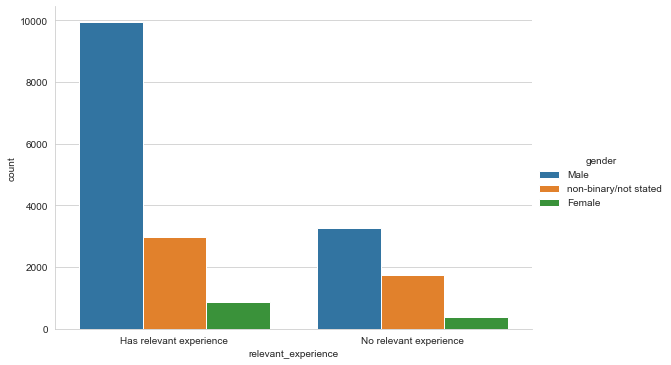

In [21]:
sns.catplot(x='relevant_experience',data=job_changes_df,kind='count',hue='gender',aspect=1.5)

It should be noted the considerable disparity between the amount of men to non-binary to women ratio in this dataset, so this might lead to misperceptions about the relationship to gender and whether someone has relevant experience in this field.

In [22]:
job_changes_df.groupby('gender')['relevant_experience'].value_counts()

gender                 relevant_experience    
Female                 Has relevant experience     871
                       No relevant experience      367
Male                   Has relevant experience    9955
                       No relevant experience     3266
non-binary/not stated  Has relevant experience    2966
                       No relevant experience     1733
Name: relevant_experience, dtype: int64

In [23]:
prob_fem_rel_exp = (871/(871+361))*100
prob_male_rel_exp = (9955/(9955+3266))*100
prob_non_bin_rel_exp = (2966/(2966+1733))*100

In [24]:
print(f"The probability that a woman has relevant experience in this field is %.1f percent." %prob_fem_rel_exp)
print(f"The probability that a man has relevant experience in this field is %.1f percent." %prob_male_rel_exp)
print(f"The probability that a non-binary person has relevant experience in this field is %.1f percent." %prob_non_bin_rel_exp)

The probability that a woman has relevant experience in this field is 70.7 percent.
The probability that a man has relevant experience in this field is 75.3 percent.
The probability that a non-binary person has relevant experience in this field is 63.1 percent.


The probabilities are close in comparison. Running a test on this to see if there is potential discrimination may be interesting to investigate.

## Does having too many previous jobs and a lack of experience affect a person's decision to leave a company?

Let's see how the number of previous jobs compares to whether or not someone has relevant experience. I'd predict the more previous jobs you've had, the more likely you are to have relevant experience in this field.

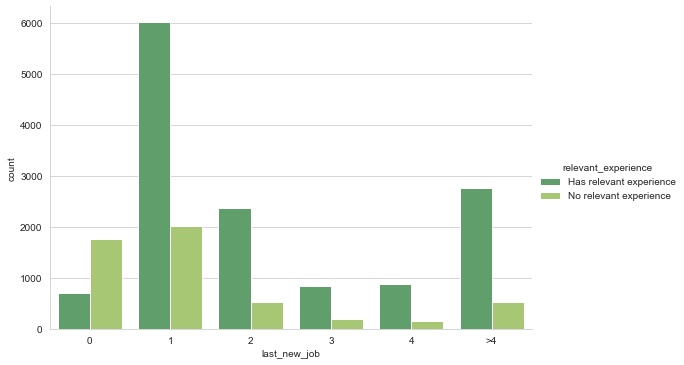

In [25]:
sns.catplot(x='last_new_job',data=job_changes_df,kind='count',hue='relevant_experience',aspect=1.5,palette='summer',order=[0,'1','2','3','4','>4'])

This follows what most people would intuitively think. If you have barely worked for a company, you're assumed to less experienced in a new position and it's easier for you to leave as you haven't earned higher wages or extra benefits. Most people who have stayed with the company for a longer duration have a much higher likelihood of having knowledge in this field and are comfortable with/enjoy/are good at what they do.

Now let's find out if the number of jobs one's had previous to their current job factors in to whether they are looking for a new job or not:

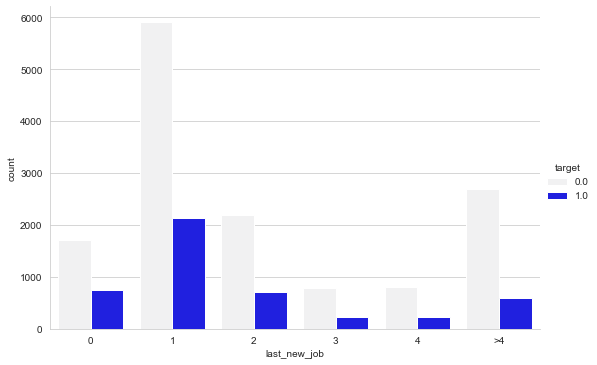

In [26]:
sns.catplot(x='last_new_job',data=job_changes_df,kind='count',hue='target',aspect=1.5,color='blue',order=[0,'1','2','3','4','>4'])

This does seem to indicate some interesting details as to why someone might quit their job for another. The most likely categories are people have had 2 previous jobs or less. The 1 category is most likely higest due to people having had a job before and not realizing it wasn't as bad as the job they're at currently. The >4 category could be including people who are close to retiring, so that could category may be more misleading than informative. Let's see what their probabilities are:

In [27]:
job_changes_df.groupby('last_new_job')['target'].value_counts()

last_new_job  target
0             0.0       1713
              1.0        739
1             0.0       5915
              1.0       2125
2             0.0       2200
              1.0        700
3             0.0        793
              1.0        231
4             0.0        801
              1.0        228
>4            0.0       2690
              1.0        600
Name: target, dtype: int64

In [28]:
prob_job0 = 758/(1750+758)*100
prob_job1 = 2191/(2191+6026)*100
prob_job2 = 726/(726+2249)*100
prob_job3 = 238/(238+803)*100
prob_job4 = 235/(235+820)*100
prob_jobgt4 = 629/(2733+629)*100

In [29]:
my_list = [prob_job0,prob_job1,prob_job2,prob_job3,prob_job4,prob_jobgt4]

In [30]:
for i in my_list:
    if my_list.index(i) < 5:
        print(f'The probability that someone who has been with their current company for {my_list.index(i)} years wants to find another job is %.1f percent.' %i)
        
    else:
        print(f'The probability that someone who has been with their current company for more than 4 years wants to find another job is %.1f percent.' %i)

The probability that someone who has been with their current company for 0 years wants to find another job is 30.2 percent.
The probability that someone who has been with their current company for 1 years wants to find another job is 26.7 percent.
The probability that someone who has been with their current company for 2 years wants to find another job is 24.4 percent.
The probability that someone who has been with their current company for 3 years wants to find another job is 22.9 percent.
The probability that someone who has been with their current company for 4 years wants to find another job is 22.3 percent.
The probability that someone who has been with their current company for more than 4 years wants to find another job is 18.7 percent.


There is clearly a trend between someone's likelihood of looking for another job and how long an employee has been with the company.

The '5 years' category in the graph below represents people who have been with their current employer for more than 4 years.

Text(0, 0.5, 'Probability someone is looking for a job')

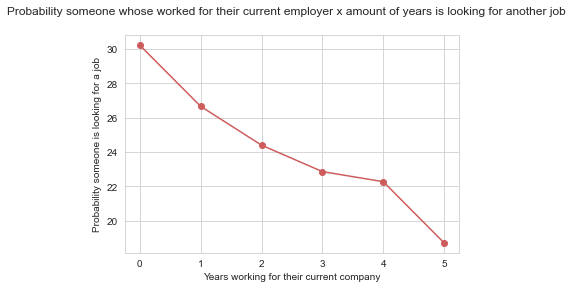

In [31]:
plt.plot(my_list,linestyle='-',color='indianred',marker='o')

plt.suptitle('Probability someone whose worked for their current employer x amount of years is looking for another job')

plt.xlabel('Years working for their current company')
plt.ylabel('Probability someone is looking for a job')

Let's see if there's a trend between having relevant experience and person's likelihood of looking for a job:

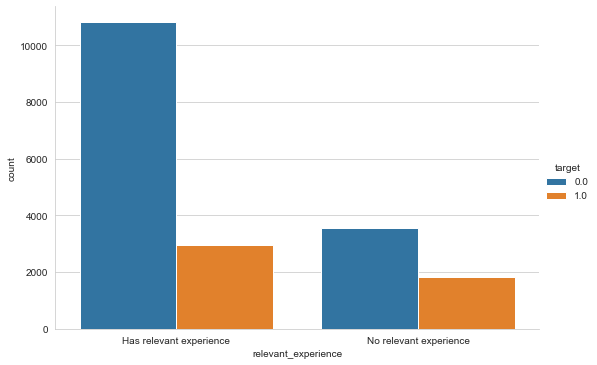

In [32]:
sns.catplot(x='relevant_experience',data=job_changes_df,kind='count',hue='target',aspect=1.5)

In [33]:
job_changes_df.groupby('relevant_experience')['target'].value_counts()

relevant_experience      target
Has relevant experience  0.0       10831
                         1.0        2961
No relevant experience   0.0        3550
                         1.0        1816
Name: target, dtype: int64

In [34]:
prob_rel_exp0 = 2961/(10831+2961)*100
prob_rel_exp1 = 1816/(1816+3550)*100

In [35]:
has_rel_exp_list = [prob_rel_exp0,prob_rel_exp1]

print(f'The probability that someone with relevant experience wants to find another job is %.1f percent.' %has_rel_exp_list[0])
print(f'The probability that someone with no relevant experience wants to find another job is %.1f percent.' %has_rel_exp_list[1])

The probability that someone with relevant experience wants to find another job is 21.5 percent.
The probability that someone with no relevant experience wants to find another job is 33.8 percent.


Clearly a trend here. This gives us a good idea that hiring people with relevant experience results in them being less likely to look for another job.

## Did a person's education level or major/discipline affect their likelihood of having relevent experience?

In [36]:
job_changes_df.head()

,enrollee_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevant experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,non-binary/not stated,No relevant experience,Full time course,Graduate,STEM,5,NaN,NaN,0,83,0.0
3,33241,city_115,0.789,non-binary/not stated,No relevant experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,0,52,1.0
4,666,city_162,0.767,Male,Has relevant experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [37]:
job_changes_df.major_discipline.value_counts()

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

In [38]:
job_changes_df.education_level.value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

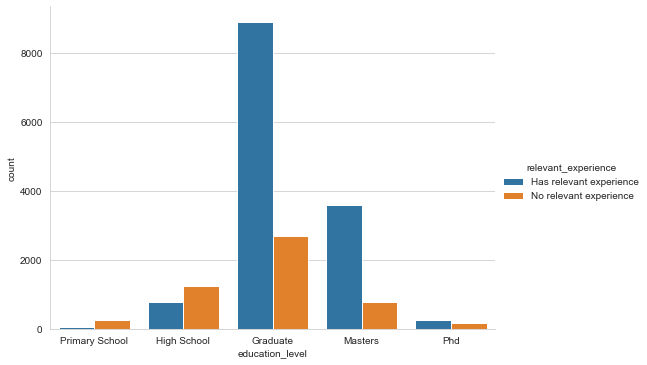

In [39]:
sns.catplot(x='education_level',data=job_changes_df,kind='count',hue='relevant_experience',
            order=['Primary School','High School','Graduate','Masters','Phd'],aspect=1.4)

It's evident that - to a certain extent - Having a degree from some education beyond the high school level allows individuals a much higher probability of having relevent experience in that field. Interestingly, the Phd category has a low has-to-no relevant experience ratio (lower than expected), which most likely means many of the people with PhDs with no relevent experience are making a career change. 

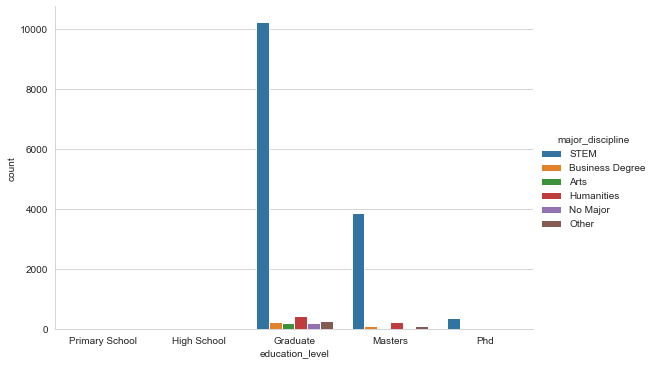

In [40]:
sns.catplot(x='education_level',data=job_changes_df,kind='count',hue='major_discipline',
            order=['Primary School','High School','Graduate','Masters','Phd'],aspect=1.5)

The vast majority of employees in the data scientist field come from STEM backgrounds, which makes sense. The second highest appears to be humanities, which is pretty interesting and unexpected. I would assume this is due to how easy it is to learn about programming and data science through self-study and that the humanities field is a competitive environment.

In [41]:
job_changes_df.groupby('education_level')['relevant_experience'].value_counts()

education_level  relevant_experience    
Graduate         Has relevant experience    8898
                 No relevant experience     2700
High School      No relevant experience     1236
                 Has relevant experience     781
Masters          Has relevant experience    3577
                 No relevant experience      784
Phd              Has relevant experience     259
                 No relevant experience      155
Primary School   No relevant experience      242
                 Has relevant experience      66
Name: relevant_experience, dtype: int64

In [42]:
prim_prob = 66/(242+66)*100
high_prob = 781/(1236+781)*100
grad_prob = 8898/(8898+2700)*100
mast_prob = 3577/(3577+784)*100
phd_prob = 259/(259+155)*100

edu_prob_list = [prim_prob,high_prob,grad_prob,mast_prob,phd_prob]
edu_order_list = ['Primary School','High School','Graduate','Masters','Phd']

for i in edu_prob_list:
    print(f'The probability that someone whose completed a {edu_order_list[edu_prob_list.index(i)]} education has \n relevant experience in the data scientist field is %.1f.' %i)

The probability that someone whose completed a Primary School education has 
 relevant experience in the data scientist field is 21.4.
The probability that someone whose completed a High School education has 
 relevant experience in the data scientist field is 38.7.
The probability that someone whose completed a Graduate education has 
 relevant experience in the data scientist field is 76.7.
The probability that someone whose completed a Masters education has 
 relevant experience in the data scientist field is 82.0.
The probability that someone whose completed a Phd education has 
 relevant experience in the data scientist field is 62.6.


In [43]:
edu_coords = []

for i in range(0,len(edu_prob_list)):
    edu_coords.append((edu_order_list[i],int(edu_prob_list[i])))
    
edu_coords

[('Primary School', 21),
 ('High School', 38),
 ('Graduate', 76),
 ('Masters', 82),
 ('Phd', 62)]

Text(0, 0.5, 'Probability')

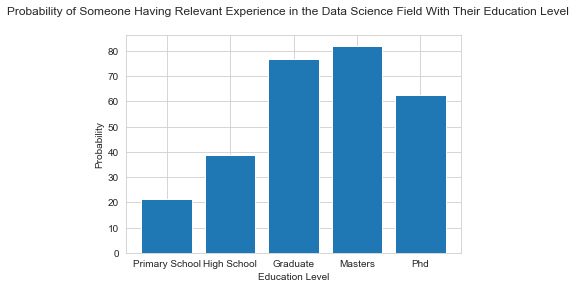

In [44]:
plt.bar(x=edu_order_list,height=edu_prob_list)

plt.suptitle('Probability of Someone Having Relevant Experience in the Data Science Field With Their Education Level')

plt.xlabel('Education Level')
plt.ylabel('Probability') 

How does this education affect someone's decision to be actively looking for another job?

In [45]:
job_changes_df.groupby('education_level').target.value_counts()

education_level  target
Graduate         0.0       8353
                 1.0       3245
High School      0.0       1623
                 1.0        394
Masters          0.0       3426
                 1.0        935
Phd              0.0        356
                 1.0         58
Primary School   0.0        267
                 1.0         41
Name: target, dtype: int64

In [46]:
prim = 41/(267+41)*100
high = 394/(1623+394)*100
grad = 3245/(3245+8353)*100
mast = 935/(935+3426)*100
phd = 58/(58+356)*100

edu_leave_list = [prim,high,grad,mast,phd]

for i in edu_leave_list:
    print(f'The probability that someone whose completed a {edu_order_list[edu_leave_list.index(i)]} education wants to \n find another job is %.1f.' %i)

The probability that someone whose completed a Primary School education wants to 
 find another job is 13.3.
The probability that someone whose completed a High School education wants to 
 find another job is 19.5.
The probability that someone whose completed a Graduate education wants to 
 find another job is 28.0.
The probability that someone whose completed a Masters education wants to 
 find another job is 21.4.
The probability that someone whose completed a Phd education wants to 
 find another job is 14.0.


Text(0, 0.5, 'Probability')

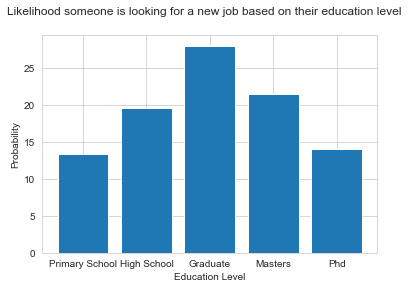

In [47]:
plt.bar(x=edu_order_list,height=edu_leave_list)

plt.suptitle('Likelihood someone is looking for a new job based on their education level')

plt.xlabel('Education Level')
plt.ylabel('Probability')

This shows that the most likely groups of people that want to leave their job have the following education levels (in descending order): 
    
    Graduate, Masters, High school, Phd, and Primary School.

In [48]:
job_changes_df.groupby('major_discipline').target.value_counts()

major_discipline  target
Arts              0.0         200
                  1.0          53
Business Degree   0.0         241
                  1.0          86
Humanities        0.0         528
                  1.0         141
No Major          0.0         168
                  1.0          55
Other             0.0         279
                  1.0         102
STEM              0.0       10701
                  1.0        3791
Name: target, dtype: int64

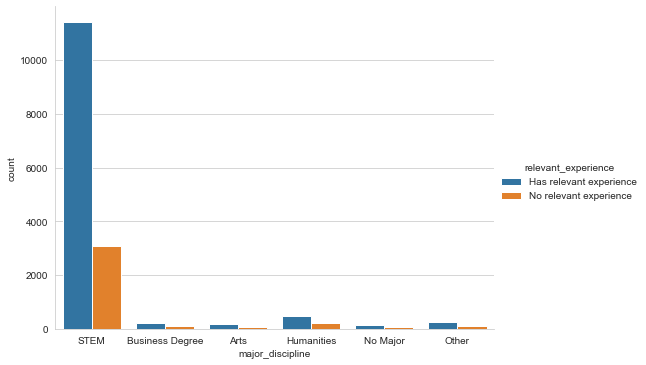

In [49]:
sns.catplot(x='major_discipline',data=job_changes_df,kind='count',hue='relevant_experience',aspect=1.4)

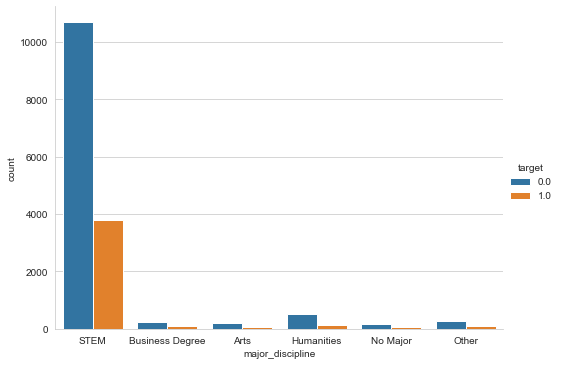

In [50]:
sns.catplot(x='major_discipline',data=job_changes_df,kind='count',hue='target',aspect=1.4)

The two graphs above appear to be very similar, meaning that a vast majority of people looking for new jobs are doing so because they don't think they have relevant experience for their position.

In [51]:
arts_prob = 53/(53+200)*100
biz_prob = 86/(86+241)*100
hum_prob = 141/(141+528)*100
no_maj_prob = 55/(55+168)*100
oth_prob = 102/(102+279)*100
stem_prob = 3791/(3791+10701)*100

maj_dis_prob_list = [arts_prob,biz_prob,hum_prob,no_maj_prob,oth_prob,stem_prob]
maj_dis_order = ['Arts','Business','Humanities','No Major','Other','STEM']

for i in maj_dis_prob_list:
    print(f'The probability that someone who graduated with a {maj_dis_order[maj_dis_prob_list.index(i)]} degree \n wants to find another job is %.1f.' %i)

The probability that someone who graduated with a Arts degree 
 wants to find another job is 20.9.
The probability that someone who graduated with a Business degree 
 wants to find another job is 26.3.
The probability that someone who graduated with a Humanities degree 
 wants to find another job is 21.1.
The probability that someone who graduated with a No Major degree 
 wants to find another job is 24.7.
The probability that someone who graduated with a Other degree 
 wants to find another job is 26.8.
The probability that someone who graduated with a STEM degree 
 wants to find another job is 26.2.


It appears that people who graduated with a Business degree, Other degree, or STEM degree are most likely to be looking for another job.

## Does the type of company and the company size affect the probability of someone leaving their company?

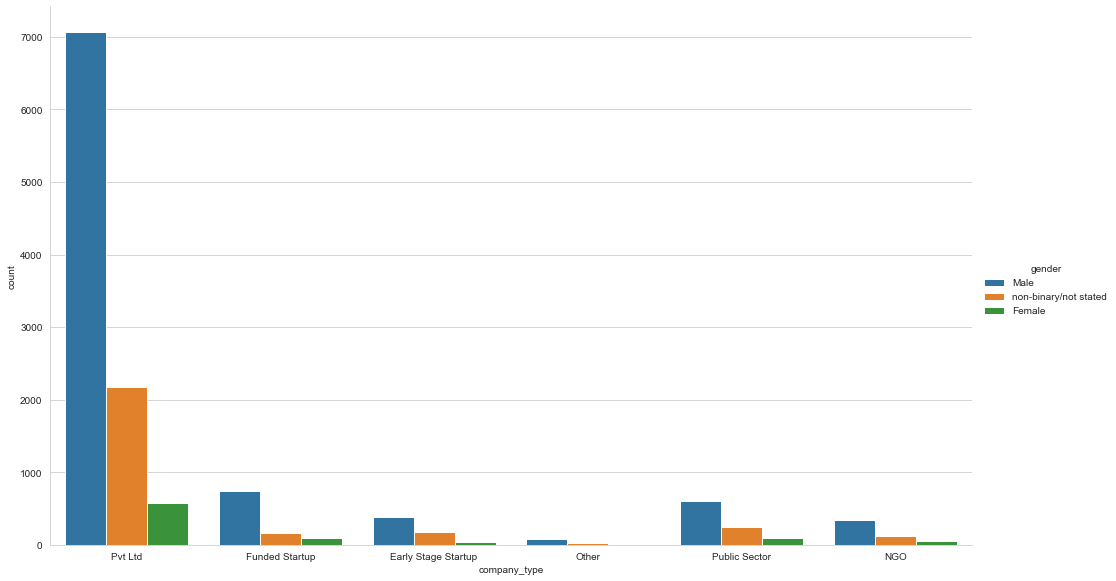

In [52]:
sns.catplot(x='company_type',data=job_changes_df,kind='count',hue='gender',aspect=1.7,height=8)

This graph shows how the private sector makes up a considerable amount of employment relative to other company types, at least for individuals in this dataset. The second most common company type is between funded start-ups and the public sector.

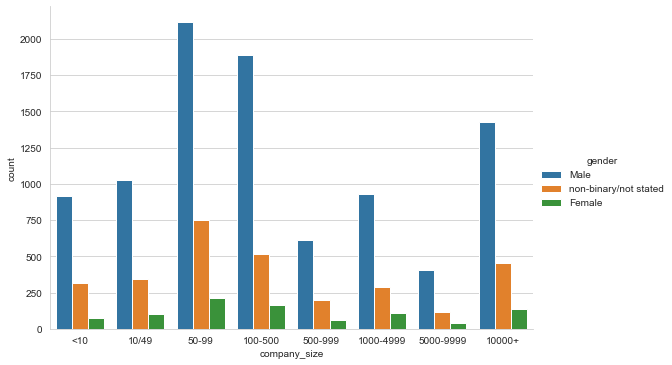

In [53]:
sns.catplot(x='company_size',data=job_changes_df,kind='count',hue='gender',aspect=1.5,
            order=['<10','10/49','50-99','100-500','500-999','1000-4999','5000-9999','10000+'])

It appears companies with 50-99 employees are the most common. This is also the company size in which every gender is hired the most. The second most common company size is 100-500 employees, and is once more the second highest in hiring every categorical gender. The third most with a similar trend are companies with 10000+ employees.

These last two bar plots show how much each company type and company size hires each categorical gender.

In [54]:
job_changes_df.groupby('company_type').target.value_counts().sort_index()

company_type         target
Early Stage Startup  0.0        461
                     1.0        142
Funded Startup       0.0        861
                     1.0        140
NGO                  0.0        424
                     1.0         97
Other                0.0         92
                     1.0         29
Public Sector        0.0        745
                     1.0        210
Pvt Ltd              0.0       8042
                     1.0       1775
Name: target, dtype: int64

In [55]:
ess_prob = 142/(461+142)*100
fs_prob = 140/(862+140)*100
ngo_prob = 97/(97+424)*100
other_prob = 29/(29+92)*100
pubs_prob = 210/(210+745)*100
pvt_prob = 1775/(1775+8042)*100

comp_type_prob_list = [ess_prob,fs_prob,ngo_prob,other_prob,pubs_prob,pvt_prob]
comp_type_order = ['ESS','FS','NGO','Other','Public Sector','Pvt Ltd']

for i in comp_type_prob_list:
    print(f'The probability that someone who works for a {comp_type_order[comp_type_prob_list.index(i)]} company type \n wants to find another job is %.1f.' %i)

The probability that someone who works for a ESS company type 
 wants to find another job is 23.5.
The probability that someone who works for a FS company type 
 wants to find another job is 14.0.
The probability that someone who works for a NGO company type 
 wants to find another job is 18.6.
The probability that someone who works for a Other company type 
 wants to find another job is 24.0.
The probability that someone who works for a Public Sector company type 
 wants to find another job is 22.0.
The probability that someone who works for a Pvt Ltd company type 
 wants to find another job is 18.1.


Text(0, 0.5, 'Probability')

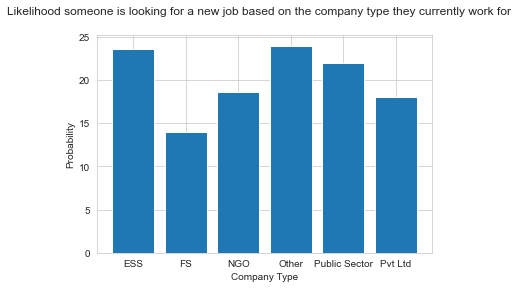

In [56]:
plt.bar(x=comp_type_order,height=comp_type_prob_list)

plt.suptitle('Likelihood someone is looking for a new job based on the company type they currently work for')

plt.xlabel('Company Type')
plt.ylabel('Probability')

It appears the most likely company types where employees want to find a new job are Early Stage startups, other, and the public sector.

In [57]:
comp_size_series=job_changes_df.groupby('company_size').target.value_counts()
comp_size_series

company_size  target
10/49         0.0       1127
              1.0        344
100-500       0.0       2156
              1.0        415
1000-4999     0.0       1128
              1.0        200
10000+        0.0       1634
              1.0        385
50-99         0.0       2538
              1.0        545
500-999       0.0        725
              1.0        152
5000-9999     0.0        461
              1.0        102
<10           0.0       1084
              1.0        224
Name: target, dtype: int64

In [58]:
c1=comp_size_series[-1]/(comp_size_series[-1]+comp_size_series[-2])*100
c2=comp_size_series[1]/(comp_size_series[1]+comp_size_series[0])*100
c3=comp_size_series[9]/(comp_size_series[9]+comp_size_series[8])*100
c4=comp_size_series[3]/(comp_size_series[2]+comp_size_series[3])*100
c5=comp_size_series[11]/(comp_size_series[10]+comp_size_series[11])*100
c6=comp_size_series[5]/(comp_size_series[5]+comp_size_series[4])*100
c7=comp_size_series[-3]/(comp_size_series[-3]+comp_size_series[-4])*100
c8=comp_size_series[7]/(comp_size_series[6]+comp_size_series[7])*100

comp_size_prob_list = [c1,c2,c3,c4,c5,c6,c7,c8]
order=['<10','10/49','50-99','100-500','500-999','1000-4999','5000-9999','10000+']

for i in comp_size_prob_list:
    print(f'The probability that someone who works for a company with {order[comp_size_prob_list.index(i)]} employees \n wants to find another job is %.1f.' %i)

The probability that someone who works for a company with <10 employees 
 wants to find another job is 17.1.
The probability that someone who works for a company with 10/49 employees 
 wants to find another job is 23.4.
The probability that someone who works for a company with 50-99 employees 
 wants to find another job is 17.7.
The probability that someone who works for a company with 100-500 employees 
 wants to find another job is 16.1.
The probability that someone who works for a company with 500-999 employees 
 wants to find another job is 17.3.
The probability that someone who works for a company with 1000-4999 employees 
 wants to find another job is 15.1.
The probability that someone who works for a company with 5000-9999 employees 
 wants to find another job is 18.1.
The probability that someone who works for a company with 10000+ employees 
 wants to find another job is 19.1.


<AxesSubplot:>

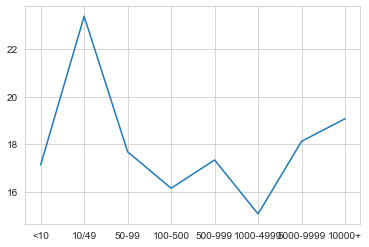

In [59]:
sns.lineplot(x=order,y=comp_size_prob_list)

Employees who most likely want to leave their current company work at companies with a size of 10-49 employees. The least likely work for companies with a size of 1000-4999.

## Does the city development index or the city they live in affect an employee's decision to leave company?


In [60]:
job_changes_df.head()

,enrollee_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevant experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,non-binary/not stated,No relevant experience,Full time course,Graduate,STEM,5,NaN,NaN,0,83,0.0
3,33241,city_115,0.789,non-binary/not stated,No relevant experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,0,52,1.0
4,666,city_162,0.767,Male,Has relevant experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [61]:
int(job_changes_df['city'][0].split('city_')[1])

103

In [62]:
for i in job_changes_df['city'].index:
    y = job_changes_df['city'][i].split('city_')
    job_changes_df['city'].loc[i] = int(y[1]) 
    
job_changes_df.head()

C:\Users\dfbod\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,enrollee_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,40,0.776,Male,No relevant experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,21,0.624,non-binary/not stated,No relevant experience,Full time course,Graduate,STEM,5,NaN,NaN,0,83,0.0
3,33241,115,0.789,non-binary/not stated,No relevant experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,0,52,1.0
4,666,162,0.767,Male,Has relevant experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


<AxesSubplot:xlabel='city', ylabel='Count'>

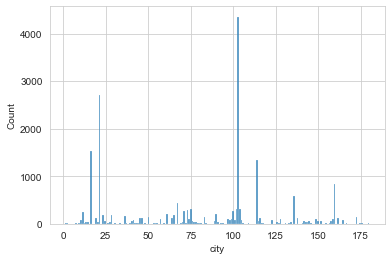

In [63]:
sns.histplot(x='city',data=job_changes_df,bins=180)

<AxesSubplot:xlabel='city_development_index', ylabel='Count'>

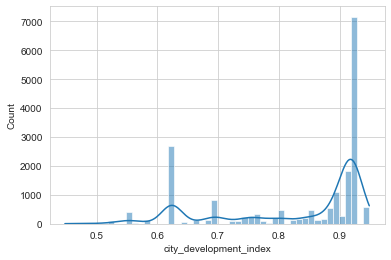

In [64]:
sns.histplot(x='city_development_index',data=job_changes_df,bins=50,kde=True)

This shows that significantly more people want to work in cities that are more developed. Another considerable amount of people don't seem to mind working in a city that is still developing.

<AxesSubplot:xlabel='city_development_index', ylabel='Count'>

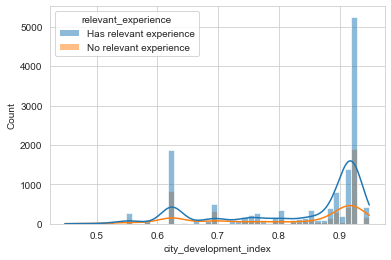

In [65]:
sns.histplot(x='city_development_index',data=job_changes_df,bins=50,kde=True,hue='relevant_experience')

<AxesSubplot:xlabel='city_development_index', ylabel='Count'>

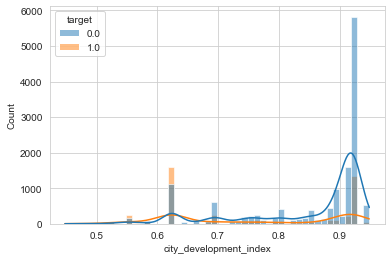

In [66]:
sns.histplot(x='city_development_index',data=job_changes_df,bins=50,kde=True,hue='target')

This graph says a lot about how people's living situation plays a significant factor into whether or not they enjoy working at their current location. Places with a city development index (CDI) between 0.7 and 0.85 enjoy their location and enjoy working for their current employer. People that live in cities with a CDI of roughly 0.63 are very likely to be looking for another job. The same is true for people living in cities with a CDI of 0.9 or higher, but the percentage of people looking for another job aren't nearly as high as people living in cities with a CDI of ~0.63 .

<AxesSubplot:xlabel='city_development_index', ylabel='Count'>

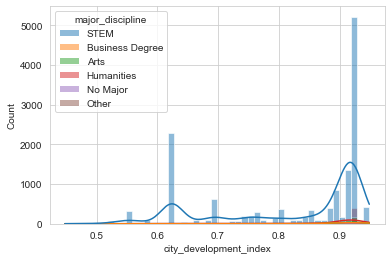

In [67]:
sns.histplot(x='city_development_index',data=job_changes_df,bins=50,kde=True,hue='major_discipline')

<AxesSubplot:xlabel='city_development_index', ylabel='Count'>

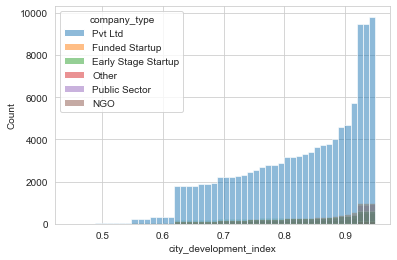

In [68]:
sns.histplot(x='city_development_index',data=job_changes_df,bins=50,cumulative=True,hue='company_type')

<AxesSubplot:xlabel='city_development_index', ylabel='Count'>

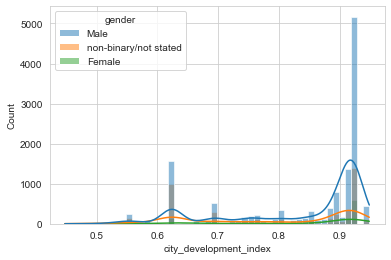

In [69]:
sns.histplot(x='city_development_index',data=job_changes_df,bins=50,kde=True,hue='gender')

## Predict how likely it is for an employee to be looking for another job:

In this calculation, we're assuming all probabilities are independent of each other. 

You can apply Bayes theorem for probabilites that are dependent on relevant experience (education level). For those cases, we have to create a for loop that calculates the probability that someone has relevant experience given they have a graduate's degree, the probability that someone has no relevant experience given they have a graduates degree, etc. I'll probably come back to correct that once I learn how use the Scikit Learn module for that.

I need to come back and calculate the probabilities for the null values, as the 'not_given' probabilities are inaccurate.

In [70]:
def prob_of_someone_looking_for_job (gen_prob=0,last_new_job_prob=0,rel_exp_prob=0,edu_prob=0,dis_prob=0,com_type_prob=0,com_size_prob=0):
    avg_prob = (gen_prob+last_new_job_prob+rel_exp_prob+edu_prob+dis_prob+com_type_prob+com_size_prob)/7
    return avg_prob

In [71]:
gen_order_list = ['Male','Female','non-binary/not stated']
last_new_job_list = [0,'1','2','3','4','>4']

In [72]:
not_given_prob = job_changes_df.education_level.value_counts(normalize=True)[3]

In [73]:
order=['<10','10/49','50-99','100-500','500-999','1000-4999','5000-9999','10000+']

In [74]:
new_gen_prob_list = np.divide(gen_prob_list,np.array([100]*len(gen_prob_list)))
new_my_list = np.divide(my_list,np.array([100]*len(my_list)))
new_has_rel_exp_list = np.divide(has_rel_exp_list,np.array([100]*len(has_rel_exp_list)))
new_edu_prob_list = np.divide(edu_prob_list,np.array([100]*len(edu_prob_list)))
new_maj_dis_prob_list = np.divide(maj_dis_prob_list,np.array([100]*len(maj_dis_prob_list)))
new_comp_type_prob_list = np.divide(comp_type_prob_list,np.array([100]*len(comp_type_prob_list)))
new_comp_size_prob_list = np.divide(comp_size_prob_list,np.array([100]*len(comp_size_prob_list)))

In [75]:
job_changes_df.company_type.fillna('Not Given',inplace=True)

job_changes_df.company_type.value_counts(normalize=True)

Pvt Ltd                0.512423
Not Given              0.320493
Funded Startup         0.052250
Public Sector          0.049849
Early Stage Startup    0.031475
NGO                    0.027195
Other                  0.006316
Name: company_type, dtype: float64

In [76]:
comp_type_order = ['Early State Starup','Funded Startup','NGO','Other','Public Sector','Pvt Ltd']
no_given_comp_type_prob = job_changes_df.company_type.value_counts(normalize=True)[1]

In [77]:
job_changes_df.company_size.fillna('Not Given',inplace=True)

In [78]:
not_given_comp_size_prob = job_changes_df.company_size.value_counts(normalize=True)[0]

In [79]:
job_changes_df.last_new_job.fillna('Not Given',inplace=True)

In [80]:
not_given_last_job_prob = job_changes_df.last_new_job.value_counts(normalize=True)['Not Given']

In [81]:
my_list = [prob_job0,prob_job1,prob_job2,prob_job3,prob_job4,prob_jobgt4]
my_list

[30.22328548644338,
 26.664232688329076,
 24.403361344537817,
 22.862632084534102,
 22.274881516587676,
 18.709101725163592]

In [82]:
rel_exp_list = ['Has relevant experience','No relevant experience'] 

In [83]:
avg_prob_arr = []

for i in range(0,len(job_changes_df)):
    for j in gen_order_list:
        if job_changes_df.gender[i]==j:
            gen_prob = new_gen_prob_list[gen_order_list.index(j)]
    for j in last_new_job_list:
        if job_changes_df.last_new_job[i]==j:
            last_new_job_prob = new_my_list[last_new_job_list.index(j)]
        else:
            last_new_job_prob = not_given_last_job_prob
    for j in rel_exp_list:
        if job_changes_df.relevant_experience[i]==j:
            rel_exp_prob = new_has_rel_exp_list[rel_exp_list.index(j)]
    for j in edu_order_list:
        if job_changes_df.education_level[i]==j:  
            edu_prob = new_edu_prob_list[edu_order_list.index(j)]
        else:
            edu_prob = not_given_prob
    for j in maj_dis_order:
        if job_changes_df.major_discipline[i]==j:
            dis_prob = new_maj_dis_prob_list[maj_dis_order.index(j)]
    for j in comp_type_order:
        if job_changes_df.company_type[i]==j:  
            com_type_prob = new_comp_type_prob_list[comp_type_order.index(j)]
        else:
            com_type_prob = no_given_comp_type_prob
    for j in order:
        if job_changes_df.company_size[i]==j:    
            com_size_prob = new_comp_size_prob_list[order.index(j)]
        else:
            com_size_prob = no_given_comp_type_prob
    
    avg_prob_arr.append(prob_of_someone_looking_for_job(gen_prob,last_new_job_prob,rel_exp_prob,
                                                        edu_prob,dis_prob,com_type_prob,com_size_prob))

In [84]:
job_changes_df['Avg_prob_someone_look_for_new_job'] = np.array(avg_prob_arr)

# Probability Distribution of people looking for a new job:

<AxesSubplot:xlabel='Avg_prob_someone_look_for_new_job', ylabel='Density'>

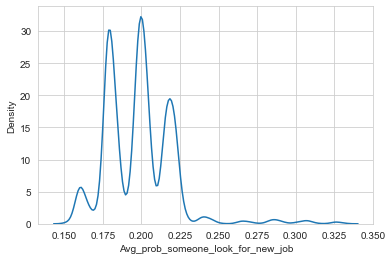

In [85]:
sns.kdeplot(x='Avg_prob_someone_look_for_new_job',data=job_changes_df)

Let's see what happens when we change the hue over different categories:

<AxesSubplot:xlabel='Avg_prob_someone_look_for_new_job', ylabel='Density'>

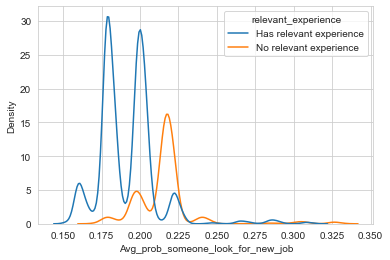

In [86]:
sns.kdeplot(x='Avg_prob_someone_look_for_new_job',data=job_changes_df,hue='relevant_experience')

<AxesSubplot:xlabel='Avg_prob_someone_look_for_new_job', ylabel='Density'>

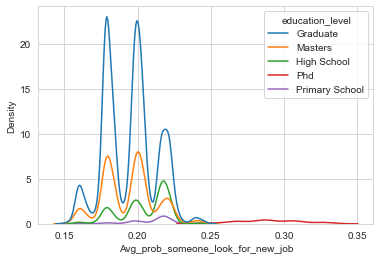

In [87]:
sns.kdeplot(x='Avg_prob_someone_look_for_new_job',data=job_changes_df,hue='education_level')

<AxesSubplot:xlabel='Avg_prob_someone_look_for_new_job', ylabel='Density'>

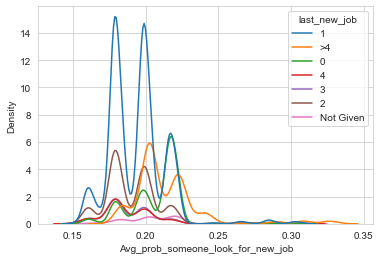

In [88]:
sns.kdeplot(x='Avg_prob_someone_look_for_new_job',data=job_changes_df,hue='last_new_job')

<AxesSubplot:xlabel='Avg_prob_someone_look_for_new_job', ylabel='Density'>

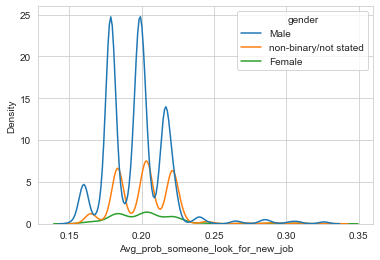

In [89]:
sns.kdeplot(x='Avg_prob_someone_look_for_new_job',data=job_changes_df,hue='gender')

<AxesSubplot:xlabel='Avg_prob_someone_look_for_new_job', ylabel='Density'>

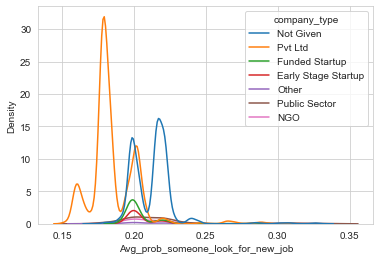

In [90]:
sns.kdeplot(x='Avg_prob_someone_look_for_new_job',data=job_changes_df,hue='company_type')

The calculations done here my have significantly affected the probabilities of 'not-given' company-type, which needs to be corrected.

<AxesSubplot:xlabel='Avg_prob_someone_look_for_new_job', ylabel='Density'>

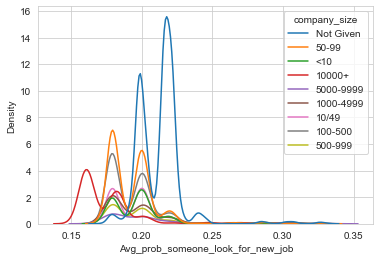

In [91]:
sns.kdeplot(x='Avg_prob_someone_look_for_new_job',data=job_changes_df,hue='company_size')

Similarly for this graph.

<AxesSubplot:xlabel='city_development_index', ylabel='Avg_prob_someone_look_for_new_job'>

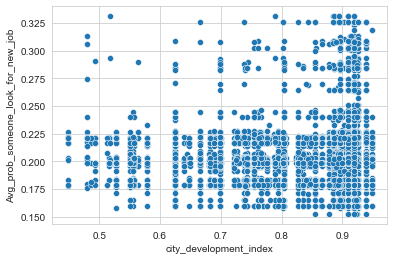

In [92]:
sns.scatterplot(x='city_development_index',y='Avg_prob_someone_look_for_new_job',data=job_changes_df)

<AxesSubplot:xlabel='Avg_prob_someone_look_for_new_job', ylabel='training_hours'>

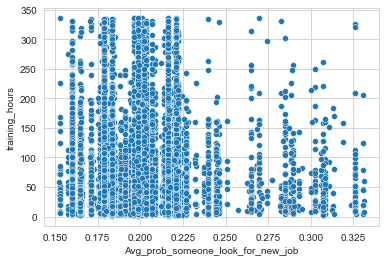

In [93]:
sns.scatterplot(y='training_hours',x='Avg_prob_someone_look_for_new_job',data=job_changes_df)

Interesting, the people who had to train the most were the peaks in the kernel density estimation plots occurred. Prehaps this is a statistical indication of the aforementioned 'burnout' syndrome.

Try some different statistical analysis methods to see how that alters this probability distribution! It could give more insight into why currently employed data scientists may look for another job.